# 数据来源
<hr>
> 
## 1.初始数据来源：已就餐状态的订单
## 2.按照手机号与姓名进行分组
## 3.拿到每个订单的消费明细，进行分隔与分词得到消费的食品名字
>> 
|school_num|name|phone|food_name
|:-------|:------:|------:|
|1|小明|18392668154|鱼香肉丝
|1|小明|18392668154|糖醋里脊
## 4.获取营养元素详情的途径：
>> 
<font size=3>4.1 上架菜品时，运营部联系质检部将营养元素写入菜品介绍<br/>
<font size=3>4.2 没有营养元素信息，则通过爬虫访问薄荷营养去拿到营养元素<br/>
>>>  
<img src='./yxrs.png'/>
>> 
<font size=3>4.3 详细数据如下<br/>
>>> 
|school_num|name|phone|food_name|heat|fat|carbon|protein|
|:-------|:------:|------:|------:|------:|------:|
|1|小明|18392668154|鱼香肉丝|127.06|7.01|7.37|9.71
|1|小明|18392668154|糖醋里脊|159.02|9.49|3.41|15.25

> ## 5.营养数据的展示:占比分析，摄入分析，营养建议，词云
>> 
<font size=3>5.1 分析摄入热量占比
>>> 
<img src='./摄入热量来源占比.png'/>
>> 
<font size=3>5.2 分析摄入量占比
>>> 
<img src='摄入量占比.png'/>
>> 
<font size=3>5.3 热量摄入排名 
>>> 
|用户摄入营养素排名 |
|-------------------:|-------|------------|
|       营养素 | 重量 | 名称 |
|       碳水摄入第一名 | 7.37克 | 宫保鸡丁 |
| 脂肪摄入第一名 | 9.49克 | 鱼香肉丝 |
| 蛋白质摄入第一名     | 15.25克 | 鱼香肉丝 |   
>> 
<font size=3>5.4 根据标准摄入给与分析
>>> 
青少年的能量处于正平衡状态，青少年对能量的需要与生长速度是成正比的，能量的来源分别为：碳水化合物55%~65%,脂肪25%~30%，蛋白质10%~15%。
<img src='推荐占比.png'/> 
    
|用户摄入占比 |
|-------------------:|-------|------------|
|营养素名称       | 占比  | 结论     |
|       脂肪摄入占比 | 31.6% | 摄入量较高 |
| 碳水化合物摄入占比 | 20.6% | 摄入量较低 |
| 蛋白质摄入占比     | 47.8% | 摄入量较高 |    

>> 
<font size=3>5.5 建议
>>> 
- 脂肪的最主要功能就是储存我们摄入的能量，其构成人体组织并供给必需的脂肪酸与脂溶性维生素，但是脂肪的摄入不能过高。建议您在日常饮食时注重脂肪的摄入与身体锻炼，过多的摄入会造成肥胖。<br/><br/>
- 碳水化合物是人类获取能量的最经济和最主要的来源，是构成机体组织的重要物质，并参与细胞的组成和多种活动，所以碳水化合物的摄入不能过低。建议您在日常饮食时注重碳水化合物的摄入。<br/><br/>
- 蛋白质是生命活动的主要承担者，机体所有重要的组成部分都需要有蛋白质的参与,您的蛋白质摄入略高，会增加肾脏的负担，摄入适当即可。
>> 
<font size=3>5.6 词云展示
>>> 
<img src='wordcloud.png'/>

### 处理数据->根据公式得出每个营养素对应KCal

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
%matplotlib inline

In [23]:
foods = pd.read_csv('./food_detail.csv')
foods.head()

,heat,school_num,name,protein,fat,carbon,phone,food_name
0,127.06,1,1,9.71,7.01,7.37,1,宫保鸡丁
1,159.02,1,1,15.25,9.49,3.41,1,鱼香肉丝


In [106]:
# 公式：蛋白质*4 脂肪*9 碳水*4 (kcal)
foods['fat_heat'] = foods['fat'].apply(lambda x: x*9)
foods['carbon_heat'] = foods['carbon'].apply(lambda x: x*4)
foods['protein_heat'] = foods['protein'].apply(lambda x: x*4)

In [107]:
foods

,heat,school_num,name,protein,fat,carbon,phone,food_name,fat_heat,carbon_heat,protein_heat,f_pct,c_pct,p_pct
0,127.06,1,1,9.71,7.01,7.37,1,宫保鸡丁,63.09,29.48,38.84,0.290992,0.305936,0.403072
1,159.02,1,1,15.25,9.49,3.41,1,鱼香肉丝,85.41,13.64,61.00,0.337123,0.121137,0.541741


In [74]:
heat = foods.heat.sum()
p_h = foods.protein_heat.sum()
c_h = foods.carbon_heat.sum()
f_h = foods.fat_heat.sum()
p = foods.protein.sum()
c = foods.carbon.sum()
f = foods.fat.sum()

### 得到各营养素做占比分析

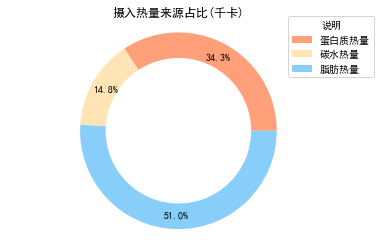

In [141]:
color = ['lightsalmon','moccasin','lightskyblue']
label = [u'蛋白质热量', u'碳水热量', u'脂肪热量']
exp = [0.02]*3
data = [p_h, c_h, f_h]
plt.pie(data,colors=color,autopct='%1.1f%%',pctdistance = 0.85,)
plt.pie([1],colors='w',radius=0.74)
plt.title("摄入热量来源占比(千卡)")
plt.legend(labels=label,bbox_to_anchor=(1.1, 1.05),title="说明")
plt.axis("equal")
plt.savefig('./摄入热量来源占比.png')

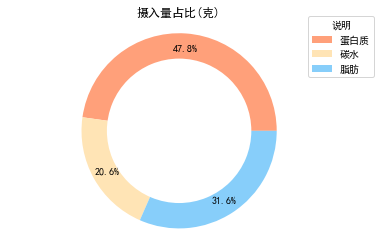

In [142]:
color = ['lightsalmon','moccasin','lightskyblue']
label = [u'蛋白质', u'碳水', u'脂肪']
exp = [0.02]*3
data = [p, c, f]
plt.pie(data,colors=color,autopct='%1.1f%%',pctdistance = 0.85,)
plt.pie([1],colors='w',radius=0.74)
plt.title("摄入量占比(克)")
plt.legend(labels=label,bbox_to_anchor=(1.1, 1.05),title="说明")
plt.axis("equal")
plt.savefig('./摄入量占比.png')

In [103]:
print('碳水摄入第一名：', foods['carbon'].max(), foods.iloc[np.argmax(foods['carbon'])]['food_name'])
print('脂肪摄入第一名：', foods['fat'].max(), foods.iloc[np.argmax(foods['fat'])]['food_name'])
print('蛋白质摄入第一名：', foods['protein'].max(), foods.iloc[np.argmax(foods['protein'])]['food_name'])

碳水摄入第一名： 7.37 宫保鸡丁
脂肪摄入第一名： 9.49 鱼香肉丝
蛋白质摄入第一名： 15.25 鱼香肉丝


E:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


### 摄入分析->根据占比与标准摄入进行对比，进行摄入分析

青少年的能量处于正平衡状态，青少年对能量的需要与生长速度是成正比的，能量的来源分别为：碳水化合物55%~65%,脂肪25%~30%，蛋白质10%~15%。


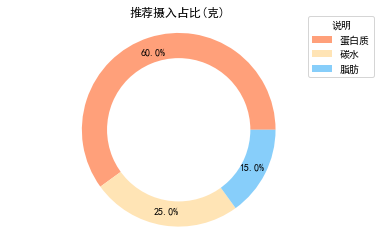

In [149]:
advice = '青少年的能量处于正平衡状态，青少年对能量的需要与生长速度是成正比的，能量的来源分别为：碳水化合物55%~65%,脂肪25%~30%，蛋白质10%~15%。'
print(advice)
color = ['lightsalmon','moccasin','lightskyblue']
label = [u'蛋白质', u'碳水', u'脂肪']
exp = [0.02]*3
data = ['0.60', '0.25', '0.15']
plt.pie(data,colors=color,autopct='%1.1f%%',pctdistance = 0.85,)
plt.pie([1],colors='w',radius=0.74)
plt.title("推荐摄入占比(克)")
plt.legend(labels=label,bbox_to_anchor=(1.1, 1.05),title="说明")
plt.axis("equal")
plt.savefig('推荐摄入占比.png')

In [109]:
# 计算用户摄入量占比,根据推荐摄入占比进行分析
# 计算摄入量占比
f_pct = foods['fat'].sum()/(foods['fat'].sum()+foods['carbon'].sum()+foods['protein'].sum())
c_pct = foods['carbon'].sum()/(foods['fat'].sum()+foods['carbon'].sum()+foods['protein'].sum())
p_pct = foods['protein'].sum()/(foods['fat'].sum()+foods['carbon'].sum()+foods['protein'].sum())
print(f_pct, c_pct, p_pct)

0.3158499234303216 0.2063552833078101 0.4777947932618683


### 健康建议

In [138]:
standard = {'fat_low':0.25, 'fat_high':0.30, 'carbon_low':0.55, 'carbon_high':0.65, 'protein_low':0.1, 'protein_hgih':0.15}
def analyse(f, c, p, standard, delta=0.0):
    result = ''
    suggest = ''
    delta = 0.05
    if f < standard['fat_low'] - delta:
        result += '脂肪摄入占比%1.1f%%，摄入量较低\n'%(f*100)
        suggest += '脂肪的最主要功能就是储存我们摄入的能量，其构成人体组织并供给必需的脂肪酸与脂溶性维生素，所以脂肪的摄入不能过低。建议您在日常饮食时注重脂肪的摄入。\n'
    elif f > standard['fat_high'] - delta:
        result += '脂肪摄入占比%1.1f%%，摄入量较高\n'%(f*100)
        suggest += '脂肪的最主要功能就是储存我们摄入的能量，其构成人体组织并供给必需的脂肪酸与脂溶性维生素，但是脂肪的摄入不能过高。建议您在日常饮食时注重脂肪的摄入与身体锻炼，过多的摄入会造成肥胖。\n'
    if f < standard['carbon_low'] - delta:
        result += '碳水化合物摄入占比%1.1f%%，摄入量较低\n'%(c*100)
        suggest += '碳水化合物是人类获取能量的最经济和最主要的来源，是构成机体组织的重要物质，并参与细胞的组成和多种活动，所以碳水化合物的摄入不能过低。建议您在日常饮食时注重碳水化合物的摄入。\n'
    elif f > standard['carbon_high'] - delta:
        result += '碳水化合物摄入占比%1.1f%%，摄入量较高\n'%(c*100)
        suggest += '碳水化合物是人类获取能量的最经济和最主要的来源，是构成机体组织的重要物质，并参与细胞的组成和多种活动，但是碳水化合物的摄入不能过高。建议您在日常饮食时注重碳水化合物的摄入，过多的摄入会转化成脂肪贮存于身体内，使人过于肥胖。\n'
    if f < standard['protein_low'] - delta:
        result += '蛋白质摄入占比%1.1f%%，摄入量较低\n'%(p*100)
        suggest += '蛋白质是生命活动的主要承担者，机体所有重要的组成部分都需要有蛋白质的参与,您的蛋白质摄入略低，会导致肌肉变松弛，免疫力下降等问题，所以建议您日常饮食中多摄入蛋白质。\n'
    elif f > standard['protein_hgih'] - delta:
        result += '蛋白质摄入占比%1.1f%%，摄入量较高\n'%(p*100)
        suggest += '蛋白质是生命活动的主要承担者，机体所有重要的组成部分都需要有蛋白质的参与,您的蛋白质摄入略高，会增加肾脏的负担，摄入适可即可。\n'
    if ((standard['fat_low'] - delta <= f) & (f <= standard['fat_high'] - delta)):
        suggest += '您的脂肪摄入良好，请继续保持'
    if ((standard['carbon_low'] - delta <= f) & (f <= standard['carbon_high'] - delta)):
        suggest += '您的碳水化合物摄入良好，请继续保持'
    if ((standard['protein_low'] - delta <= f) & (f <= standard['protein_hgih'] - delta)):
        suggest += '您的蛋白质摄入良好，请继续保持'
    return result, suggest

In [139]:
result, suggest = analyse(f_pct, c_pct, p_pct, standard)
print(suggest)
print(result)

脂肪的最主要功能就是储存我们摄入的能量，其构成人体组织并供给必需的脂肪酸与脂溶性维生素，但是脂肪的摄入不能过高。建议您在日常饮食时注重脂肪的摄入与身体锻炼，过多的摄入会造成肥胖。
碳水化合物是人类获取能量的最经济和最主要的来源，是构成机体组织的重要物质，并参与细胞的组成和多种活动，所以碳水化合物的摄入不能过低。建议您在日常饮食时注重碳水化合物的摄入。
蛋白质是生命活动的主要承担者，机体所有重要的组成部分都需要有蛋白质的参与,您的蛋白质摄入略高，会增加肾脏的负担，摄入适可即可。

脂肪摄入占比31.6%，摄入量较高
碳水化合物摄入占比20.6%，摄入量较低
蛋白质摄入占比47.8%，摄入量较高



In [1]:
# 示范
import collections # 词频统计库
import numpy as np # numpy数据处理库
import wordcloud # 词云展示库
from PIL import Image # 图像处理库
import matplotlib.pyplot as plt # 图像展示库

In [26]:
name = '荷包鱿鱼 沙参心肺汤 冬菜扣肉 酱酥桃仁 红油耳片 酸辣臊子蹄筋 炝黄瓜 麻酱凤尾 家常海参 鲜花豆腐 坛子肉 鱼香牛肉丝 宫保鸡丁 宫保鸡丁 宫保鸡丁 宫保鸡丁 宫保鸡丁 宫保鸡丁 宫保鸡丁 酸辣臊子蹄筋 炝黄瓜 麻酱凤尾 家常海参 鲜花豆腐 坛子肉 鱼香牛肉丝 火爆荔枝腰 盐水肫花 荷包鱿鱼 沙参心肺汤 冬菜扣肉 酱酥桃仁 红油耳片 酸辣臊子蹄筋 炝黄瓜 麻酱凤尾 家常海参 鲜花豆腐 坛子肉 鱼香牛肉丝 宫保鸡丁 宫保鸡丁 宫保鸡丁 宫保鸡丁 宫保鸡丁 宫保鸡丁 宫保鸡丁 烤小鸡 雪梨肘棒  鱼香牛肉 丝雪花鸡淖 火爆腰花 酸辣臊子蹄筋 炝黄瓜 麻酱凤尾 家常海参 鲜花豆腐 坛子肉 鱼香牛肉丝 火爆荔枝腰 盐水肫花 荷包鱿鱼 沙参心肺汤 冬菜扣肉 酱酥桃仁 红油耳片 酸辣臊子蹄筋 炝黄瓜 麻酱凤尾 家常海参 鲜花豆腐 坛子肉 鱼香牛肉丝 宫保鸡丁 宫保鸡丁 宫保鸡丁 宫保鸡丁 宫保鸡丁 宫保鸡丁 宫保鸡丁 酸辣臊子蹄筋 炝黄瓜 麻酱凤尾 家常海参 鲜花豆腐 坛子肉 鱼香牛肉丝 炝黄瓜 麻酱凤尾 家常海参 鲜花豆腐 坛子肉 鱼香牛肉丝 宫保鸡丁 宫保鸡丁 宫保鸡丁 宫保鸡丁 宫保鸡丁 宫保鸡丁 宫保鸡丁 烤小鸡 雪梨肘棒  鱼香牛肉 丝雪花鸡淖 火爆腰花 酸辣臊子蹄筋 炝黄瓜 麻酱凤尾 家常海参 鲜花豆腐 坛子肉 鱼香牛肉丝 火爆荔枝腰 盐水肫花 荷包鱿鱼 沙参心肺汤 冬菜扣肉 酱酥桃仁 红油耳片 酸辣臊子蹄筋 炝黄瓜 麻酱凤尾 家常海参 鲜花豆腐 坛子肉 鱼香牛肉丝 宫保鸡丁 宫保鸡丁 宫保鸡丁 宫保鸡丁 宫保鸡丁 宫保鸡丁 宫保鸡丁 酸辣臊子蹄筋 炝黄瓜 麻酱凤尾 家常海参 鲜花豆腐 坛子肉 鱼香牛肉丝 火爆荔枝腰 盐水肫花 荷包鱿鱼 沙参心肺汤 冬菜扣肉 酱酥桃仁 红油耳片 酸辣臊子蹄筋 炝黄瓜 麻酱凤尾 家常海参 鲜花豆腐 坛子肉 鱼香牛肉丝 宫保鸡丁 宫保鸡丁 宫保鸡丁 宫保鸡丁 宫保鸡丁'
name_list = name.split(r' ')

In [37]:
font_path='C:/Windows/Fonts/simhei.ttf'

wc = wordcloud.WordCloud(font_path=font_path,  # 设置字体
               background_color="white",  # 背景颜色
               max_words=1000,  # 词云显示的最大词数
               max_font_size=500,  # 字体最大值
               min_font_size=20, #字体最小值
               random_state=42, #随机数
               collocations=False, #避免重复单词
               width=1600,height=1200,margin=10, #图像宽高，字间距，需要配合下面的plt.figure(dpi=xx)放缩才有效
              )
wc.generate(name)    

(-0.5, 1599.5, 1199.5, -0.5)

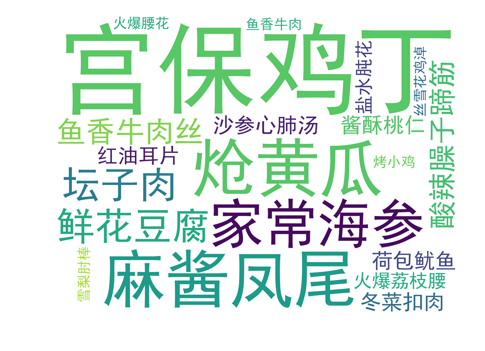

In [38]:
import matplotlib.pyplot as plt
plt.figure(dpi=100) #通过这里可以放大或缩小
plt.imshow(wc, interpolation='catrom',vmax=1000)
plt.axis("off") #隐藏坐标